<a href="https://colab.research.google.com/github/dmswneunju/DeepLearning_signiture/blob/main/ch06_DNN_F_MNIST_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 목표
* torchvision 데이터 셋을 사용하여 이미지 분류기 생성
* 생성한 모델을 저장하고, 저장된 모델을 다시 불러와서 사용

# 문제 정의
* pytorch를 사용하여 인공신경망 생성하고, 이미지 분류기 생성
 * 이미지 분류기 사용할때는 convolution layer 사용하는 것이 일반적이지만, 이 예제에서는 linear layer기반 기본적인 인공신경망 설계.
* 데이터셋 : Fashion MNIST

# 주요 개념
## 1. TensorDataset과 Dataloader
*   입력데이터를 쉽게 처리하고, 배치 단위로 잘라서 학습할 수 있게 도와주는 모듈
* (Tensor)Dataset : 학습시 사용하는 데이터의 feature(x)와 target(y)의 pair로 이루어짐.
* Dataloader : 학습 시 각 인스턴스에 쉽게 접근할 수 있도록 순회 가능한 객체(iterable)생성
* DataLoader가 하는 역할
 * shuffling
 * batch ...  
 
## 2. Device 설정
## 3. 신경망 생성
## 4. Model compile
## 5. Train
## 6. Test
## 7. Iteration
 * epochs을 반복해서 수행하면서 모델을 구성하는 최적의 파라미터 찾음.
 * for문을 통해 epochs수만큼 반복, 반복문 내에서 train, test 수행

# Fashion MNIST Classifier
옷의 품목(10가지)을 구분하는 분류기를 신경망을 사용하여 구현

## [Step1] Load libraries & Datasets
* **torch.nn** : 신경망을 생성하기 위한 기본 재료들을 제공(Modules, Sequential, Layer, Activations, Loss, Dropout...)
* **torchvision.datasets** : torchvision.transforms를 사용해 변형이 가능한 형태, feature와 label을 반환.  
datasets의 fashion mnist사용
* **torchvision.transforms**  
dataset불러온 다음에 전처리하기 위해
 * ToTensor() : ndarray를 floattensor로 변환하고 이미지 픽셀크기를 [0., 1.]범위로 조정(scale)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torch import nn

from torchvision import datasets
from torchvision.transforms import ToTensor

iris_data 다룰때에는  
numpy형태의 데이터 -> df -> dataset -> dataloader  
fashion mnist data는 torchvision에서 dataset자체로 받아올 수 있음.  
datasets : x와 y를 pair로 관리.

In [ ]:
# FashionMNIST 데이터 불러오기
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor()
)
test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## [Step2] Create DataLoader

In [ ]:
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True) #미니배치마다 64개의 이미지를 가지고 학습
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

In [ ]:
# Device 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'device = {device}')

device = cuda


## EDA

In [ ]:
print(training_data, '\n--------------\n', test_data)

In [ ]:
training_data[0]

In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


In [ ]:
train_features
print(train_labels)

label=9


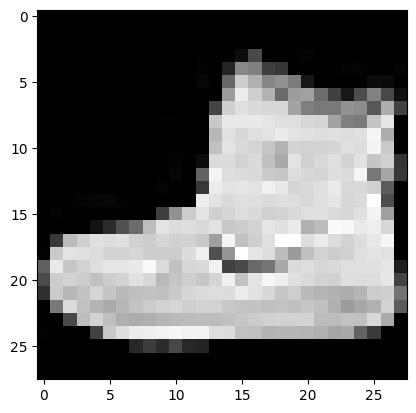

In [ ]:
img, label = training_data[0]
plt.imshow(img.squeeze(), cmap='gray')
print(f'label={label}')

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

Sneaker
Ankle Boot
Ankle Boot
Pullover
Sneaker
Trouser
Trouser
Sneaker
Pullover
Ankle Boot


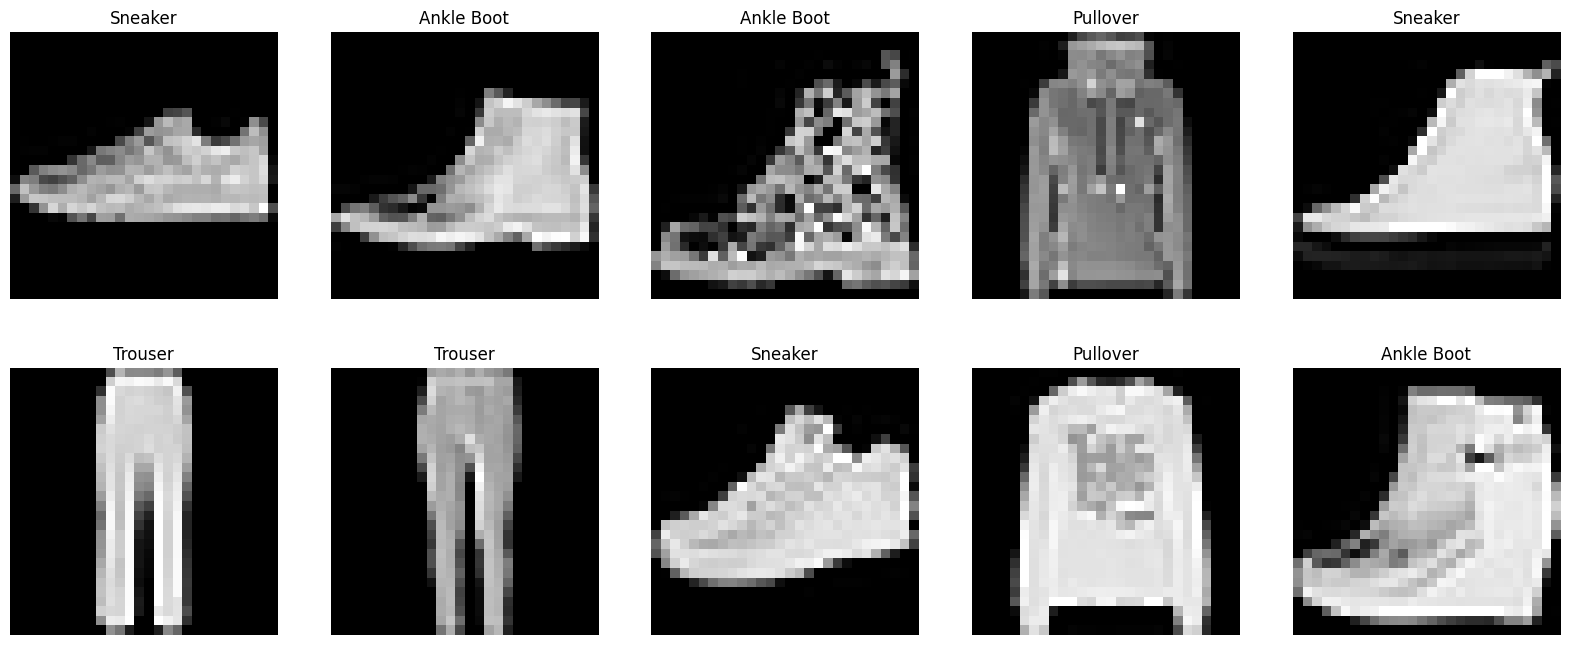

In [ ]:
figure = plt.figure(figsize = (20, 8))
cols, rows = 5,2

for i in range(1, cols*rows+1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  print(labels_map[label])
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()

## [Step3] Set Network Structure

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.classifier = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(128, 10)
    )

  def forward(self, x):
    x = self.flatten(x)
    output = self.classifier(x)
    return output

## [Step4] Create Model instance

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


## Model 테스트
모델 실행하기 전에 feedforward 연산을 잘 수행하고 있는지 확인하기 위해 model 테스트 할 수 있는 코드 작성.

In [ ]:
X = torch.rand(1, 28, 28, device = device) #입력으로 사용할 데이터 구조와 동일하게 
output = model(X)
print(f'모델 출력 결과: {output}\n')
pred_probab = nn.Softmax(dim=1)(output)
print(f'Softmax 결과: {pred_probab}\n')
y_pred = pred_probab.argmax()
print(y_pred)

## [Step5] Model compile

In [ ]:
# loss
loss = nn.CrossEntropyLoss() #다중 분류
# Optimizer
learning_rate = 1e-3 # 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## [Step6] Set train loop
data를 입력받아(x와 y로 구성) x가 모델을 통과하고 난 뒤 나온 y(예측값)과 y(실제값)을 비교해서 error를 역전파한다.

In [ ]:
def train_loop(train_loader, model, loss_fn, optimizer):
    size = len(train_loader.dataset)

    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device) #1
        pred = model(X) #2

        # 손실 계산
        loss = loss_fn(pred, y) #3

        # 역전파
        optimizer.zero_grad() 
        loss.backward() #4
        optimizer.step() #5 : optimizer를 사용하여 모델을 구성하는 parameter를 최적화한다.

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f'loss: {loss:>7f}  [{current:>5d}]/{size:5d}')

## [Step7] Set test loop

In [ ]:
def test_loop(test_loader, model, loss_fn):
    size = len(test_loader.dataset)
    num_batches = len(test_loader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device) #1
            pred = model(X) #2
            test_loss += loss_fn(pred, y).item() #3
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:8f}\n")

## [Step8] Run model

In [ ]:
epochs = 1

for i in range(epochs):
  print(f'Epochs {i+1} \n------------------')
  train_loop(train_dataloader, model, loss, optimizer)
  test_loop(test_dataloader, model, loss)
print('Done!')

Epochs 1 
------------------
loss: 2.305269  [    0]/60000
loss: 0.808578  [ 6400]/60000
loss: 0.561380  [12800]/60000
loss: 0.692481  [19200]/60000
loss: 0.413060  [25600]/60000
loss: 0.604213  [32000]/60000
loss: 0.589064  [38400]/60000
loss: 0.395305  [44800]/60000
loss: 0.484705  [51200]/60000
loss: 0.407430  [57600]/60000
Test Error: 
 Accuracy: 83.6%, Avg loss: 0.468088

Done!


In [ ]:
model

In [ ]:
 # Disable grad
with torch.no_grad():
  
  # Retrieve item
  image = training_data[0][0].to(device)
  true_target = training_data[0][1]
  
  # Generate prediction
  #model = NeuralNetwork().to(device)

  prediction = model(image)
  print(type(prediction))
  prediction = prediction

  # Predicted class value using argmax
  predicted_class = np.argmax(prediction)
  print(predicted_class)
  # Reshape image
  image = image.reshape(28, 28, 1)
  
  # Show result
  plt.imshow(image, cmap='gray')
  plt.title(f'Prediction: {predicted_class} - Actual target: {true_target}')
  plt.show()

<class 'torch.Tensor'>


TypeError: ignored

In [ ]:
type(image)

## [Step9] Save & load model


### parameter만 저장하고 불러오기(값만)
뼈대는 그대로 두고, 각각의 weight parameter들만 저장.

In [ ]:
torch.save(model.state_dict(), 'model_weights.pth')

NameError: ignored

In [ ]:
model2 = NeuralNetwork().to(device)
print(model2)

In [ ]:
model2.load_state_dict(torch.load('model_weights.pth'))#파일에는 값만 저장되어있는 상태. 값을 뼈대에 얹는 코드

In [ ]:
model2.eval()
test_loop(test_dataloader, model2, loss)

### Model 전체를 저장하고 불러오기(값+뼈대)
구조와 구조간의 값이 어떤식으로 되는지 저장하는 방법

In [ ]:
torch.save(model, 'model.pth')

In [ ]:
model3 = torch.load('model.pth')

In [ ]:
model3.eval()
test_loop(test_dataloader, model3, loss)